# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

Requirements to run this notebook:

`python>=3.5.1, pandas==0.20.3, numpy==1.11.0, seaborn==0.8, matplotlib==2.0.2, xlrd==1.1.0`

In [2]:
import os
import pandas as pd
import numpy as np
from toolz import partition_all

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline  
import seaborn as sns
from IPython.display import display, HTML

sns.set(font_scale=1.5)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
DATA_FOLDER = '../ADA2017-Tutorials/02 - Intro to Pandas/Data'
EBOLA_FOLDER = os.path.join(DATA_FOLDER, 'ebola')
MICROBIOME_FOLDER = os.path.join(DATA_FOLDER, 'microbiome')

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [3]:
def load_data_country(country, path):
    """Load data from all files for a given country

    Keyword arguments:
    country -- name of the country
    path -- dictionary of (key,value) pair where key represents the country and value is correspondingdata folder
    """
    
    ebola_data = pd.DataFrame()                                         #Empty dataframe for further concatenation
    print('Reading files :', end=' ')
    for file in [y for y in os.listdir(path[country])]: 
        print(file, end=', ')
        play = pd.read_csv(path[country] + '/' + file)
        play['FileName'] = file                                         #Adding df columns where each row has
        play['Country'] = country                                       #the same value
        ebola_data = pd.concat([ebola_data, play], axis=0)
    print('\nTotal Files Read :', str(len(os.listdir(path[country]))))
    return ebola_data

In [8]:
country_folders = {x.split('_')[0]:os.path.join(EBOLA_FOLDER,x) 
                   for x in os.listdir(EBOLA_FOLDER) 
                   if 'data' in x.lower()}
country_folders

{'guinea': '../ADA2017-Tutorials/02 - Intro to Pandas/Data/ebola/guinea_data',
 'liberia': '../ADA2017-Tutorials/02 - Intro to Pandas/Data/ebola/liberia_data',
 'sl': '../ADA2017-Tutorials/02 - Intro to Pandas/Data/ebola/sl_data'}

In [9]:
guinea_data = load_data_country('guinea', country_folders)

Reading files : 2014-08-04.csv, 2014-08-26.csv, 2014-08-27.csv, 2014-08-30.csv, 2014-08-31.csv, 2014-09-02.csv, 2014-09-04.csv, 2014-09-07.csv, 2014-09-08.csv, 2014-09-09.csv, 2014-09-11.csv, 2014-09-14.csv, 2014-09-16.csv, 2014-09-17.csv, 2014-09-19.csv, 2014-09-21.csv, 2014-09-22.csv, 2014-09-23.csv, 2014-09-24.csv, 2014-09-26.csv, 2014-09-30.csv, 2014-10-01.csv, 
Total Files Read : 22


In [10]:
liberia_data = load_data_country('liberia', country_folders)

Reading files : 2014-06-16.csv, 2014-06-17.csv, 2014-06-22.csv, 2014-06-24.csv, 2014-06-25.csv, 2014-06-28.csv, 2014-06-29.csv, 2014-07-01.csv, 2014-07-02.csv, 2014-07-03.csv, 2014-07-07.csv, 2014-07-08.csv, 2014-07-10.csv, 2014-07-13.csv, 2014-07-17.csv, 2014-07-20.csv, 2014-07-24.csv, 2014-07-26.csv, 2014-08-02.csv, 2014-08-04.csv, 2014-08-12.csv, 2014-08-15.csv, 2014-08-17.csv, 2014-08-18.csv, 2014-08-20.csv, 2014-08-25.csv, 2014-08-28.csv, 2014-09-01.csv, 2014-09-02.csv, 2014-09-03.csv, 2014-09-04.csv, 2014-09-05.csv, 2014-09-06.csv, 2014-09-07.csv, 2014-09-08.csv, 2014-09-10.csv, 2014-09-11.csv, 2014-09-12.csv, 2014-09-13.csv, 2014-09-14.csv, 2014-09-15.csv, 2014-09-16.csv, 2014-09-17-v125.csv, 2014-09-20-v128.csv, 2014-09-21-v129.csv, 2014-09-23-v131.csv, 2014-09-25-v133.csv, 2014-09-26-v134.csv, 2014-09-27-v135.csv, 2014-09-28-v136.csv, 2014-09-30-v138.csv, 2014-10-01-v139.csv, 2014-10-03-v141.csv, 2014-10-04-v142.csv, 2014-10-05-v143.csv, 2014-10-07-v145.csv, 2014-10-08-v146.cs

In [11]:
sl_data = load_data_country('sl', country_folders)

Reading files : 2014-08-12-v77.csv, 2014-08-13-v78.csv, 2014-08-14-v79.csv, 2014-08-15-v80.csv, 2014-08-16-v81.csv, 2014-08-17-v82.csv, 2014-08-18-v83.csv, 2014-08-19-v84.csv, 2014-08-20-v85.csv, 2014-08-21-v86.csv, 2014-08-22-v87.csv, 2014-08-23-v88.csv, 2014-08-24-v89.csv, 2014-08-25-v90.csv, 2014-08-26-v91.csv, 2014-08-27-v92.csv, 2014-08-28-v93.csv, 2014-08-29-v94.csv, 2014-08-30-v95.csv, 2014-08-31-v96.csv, 2014-09-01-v97.csv, 2014-09-02-v98.csv, 2014-09-03-v99.csv, 2014-09-05-v101.csv, 2014-09-06-v102.csv, 2014-09-07-v103.csv, 2014-09-08-v104.csv, 2014-09-09-v105.csv, 2014-09-10-v106.csv, 2014-09-11-v107.csv, 2014-09-12-v108.csv, 2014-09-13-v109.csv, 2014-09-14-v110.csv, 2014-09-15-v111.csv, 2014-09-16-v112.csv, 2014-09-17-v113.csv, 2014-09-18-v114.csv, 2014-09-19-v115.csv, 2014-09-20-v116.csv, 2014-09-21-v117.csv, 2014-09-22-v118.csv, 2014-09-23-v119.csv, 2014-09-24-v120.csv, 2014-09-25-v121.csv, 2014-09-26-v122.csv, 2014-09-27-v123.csv, 2014-09-28-v124.csv, 2014-09-29-v125.csv,

In [14]:
HTML(guinea_data.head(1).to_html())

,Beyla,Boffa,Conakry,Country,Coyah,Dabola,Dalaba,Date,Description,Dinguiraye,Dubreka,FileName,Forecariah,Gueckedou,Kerouane,Kindia,Kissidougou,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
0,NaN,0,5,guinea,NaN,0,NaN,2014-08-04,New cases of suspects,0,0,2014-08-04.csv,NaN,0,NaN,NaN,0,0,NaN,0,NaN,0,0,0,0,5,NaN


In [15]:
HTML(liberia_data.head(1).to_html())

,Bomi County,Bong County,Country,Date,FileName,Gbarpolu County,Grand Bassa,Grand Cape Mount,Grand Gedeh,Grand Kru,Lofa County,Margibi County,Maryland County,Montserrado County,National,Nimba County,River Gee County,RiverCess County,Sinoe County,Unnamed: 18,Variable
0,NaN,NaN,liberia,6/16/2014,2014-06-16.csv,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Specimens collected


In [16]:
HTML(sl_data.head(1).to_html())

,34 Military Hospital,Bo,Bo EMC,Bombali,Bonthe,Country,FileName,Hastings-F/Town,Kailahun,Kambia,Kenema,Kenema (IFRC),Kenema (KGH),Koinadugu,Kono,Moyamba,National,Police training School,Police traning School,Port Loko,Pujehun,Tonkolili,Unnamed: 18,Western area,Western area combined,Western area rural,Western area urban,date,variable
0,NaN,654142,NaN,494139,168729,sl,2014-08-12-v77.csv,NaN,465048,341690,653013,NaN,NaN,335471,325003,278119,6348350,NaN,NaN,557978,335574,434937,NaN,NaN,NaN,263619,1040888,2014-08-12,population


### Drop Columns
Dropping all columns which are of no interest to us

In [17]:
cols_of_interest = {'guinea':['Country', 'Description', 'Totals', 'FileName'],
                    'liberia':['Country', 'Variable','National', 'FileName'],
                    'sl':['Country', 'variable','National', 'FileName']}

guinea_data.drop([v for v in list(guinea_data.columns) if v not in cols_of_interest['guinea']], axis=1, inplace=True)
guinea_data = guinea_data.set_index(['Country', 'FileName', 'Description'])  #unique index

liberia_data.drop([v for v in list(liberia_data.columns) if v not in cols_of_interest['liberia']], axis=1, inplace=True)
liberia_data = liberia_data.set_index(['Country', 'FileName', 'Variable'])
liberia_data.index.names = guinea_data.index.names                           #common index and
liberia_data.columns = guinea_data.columns                                   #column names for all countries

sl_data.drop([v for v in list(sl_data.columns) if v not in cols_of_interest['sl']], axis=1, inplace=True)
sl_data = sl_data.set_index(['Country', 'FileName', 'variable'])
sl_data.index.names = guinea_data.index.names
sl_data.columns = guinea_data.columns

### Drop Rows
Dropping rows which are of no interest to us
#### Observations
Data for all the countries are not consistent and hence they need to be treated individually
For Guinea, cumulative values for total deaths and new cases are available in file
For Liberia, cumulative values for total deaths is available but not for new cases (to be inferred by summing up)
For Sierra Leone (sl), cumulative values are not available and need to be inferred by summing up the individual metrics
In case of Liberia, the description values are not conisistent (see below). Eg. Cumulative 'total deaths metrics' has three variations
We need to use a combination of the cumulative metric and individual metrics as in some cases only one of them may be present because of missing data

In [18]:
liberia_data.index.get_level_values('Description').unique()

Index(['Specimens collected', 'Specimens pending for testing', 'Total specimens tested', 'Newly reported deaths', 'Total death/s in confirmed cases', 'Total death/s in probable cases', 'Total death/s in suspected cases', 'Total death/s in confirmed, probable, suspected cases', 'Case Fatality Rate (CFR) - Confirmed & Probable Cases', 'Newly reported contacts', 'Total contacts listed', 'Currently under follow-up', 'Contacts seen', 'Contacts who completed 21 day follow-up', 'Contacts lost to follow-up', 'New admissions', 'Total no. currently in Treatment Units', 'Total discharges', 'Cumulative admission/isolation', 'Newly Reported Cases in HCW', 'Cumulative cases among HCW', 'Newly Reported deaths in HCW', 'Cumulative deaths among HCW', 'New Case/s (Suspected)', 'New Case/s (Probable)', 'New case/s (confirmed)', 'Total suspected cases', 'Total probable cases', 'Total confirmed cases', 'Total Number of Confirmed Cases of Sierra Leonean Nationality',
       'Total Number of Confirmed Cases 

In [19]:
rows_of_interest = {'guinea':['New cases of suspects', 'New cases of probables', 'New cases of confirmed',
                              'Total new cases registered so far','Total deaths of suspects', 
                              'Total deaths of probables', 'Total deaths of confirmed',
                              'Total deaths (confirmed + probables + suspects)'],
                    'liberia':['Total death/s in confirmed cases', 'Total death/s in probable cases', 
                               'Total death/s in suspected cases', 
                               'Total death/s in confirmed, probable, suspected cases',
                              'New Case/s (Suspected)', 'New Case/s (Probable)', 'New case/s (confirmed)',
                              'Total death/s in confirmed, \n probable, suspected cases',
                              'Total death/s in confirmed,  probable, suspected cases'],
                    'sl':['new_suspected', 'new_probable', 'new_confirmed', 'death_suspected', 'death_probable',
                         'death_confirmed']
                   }

In [20]:
guinea_data = guinea_data.loc[guinea_data.index.get_level_values('Description').isin(rows_of_interest['guinea'])]
sl_data = sl_data.loc[sl_data.index.get_level_values('Description').isin(rows_of_interest['sl'])]
liberia_data = liberia_data.loc[liberia_data.index.get_level_values('Description').isin(rows_of_interest['liberia'])]

In [22]:
size = lambda x: len(x)
guinea_data.groupby(['FileName']).agg(['size'])
# size denotes the number of "interesting" variables found in individual files for verification

,Totals
,size
FileName,
2014-08-04.csv,8
2014-08-26.csv,8
2014-08-27.csv,8
2014-08-30.csv,8
2014-08-31.csv,8
2014-09-02.csv,8
2014-09-04.csv,8
2014-09-07.csv,8


In [23]:
# Since all variable are available and they have non-zero values, we pick up the cumulative metric for Guinea
guinea_data = guinea_data.loc[guinea_data.index.get_level_values('Description').isin([
    'Total new cases registered so far', 
    'Total deaths (confirmed + probables + suspects)'])]
guinea_data = guinea_data.unstack(level=-1)

In [24]:
# guinea_data.columns = guinea_data.columns.droplevel()
guinea_data.columns = ['Total New Cases', 'Total New Deaths']        #renaming columns for consistency
guinea_data

Total New Cases Total New Deaths
Country FileName                                       
guinea  2014-08-04.csv             363                9
        2014-08-26.csv             958               28
        2014-08-27.csv             438               22
        2014-08-30.csv             468               24
        2014-08-31.csv             489               46
        2014-09-02.csv             501               25
        2014-09-04.csv             522               30
        2014-09-07.csv             557               16
        2014-09-08.csv             557               16
        2014-09-09.csv             565               16
        2014-09-11.csv             568               22
        2014-09-14.csv             595               25
        2014-09-16.csv             608               10
        2014-09-17.csv             608               10
        2014-09-19.csv             630               16
        2014-09-21.csv             632               18
        2014-09-22.csv             635               19
        2014-09-23.csv             643               29
        2014-09-24.csv             648               28
        2014-09-26.csv             668               19
        2014-09-30.csv             714               15
        2014-10-01.csv             739               34

In [25]:
sl_data.groupby(['FileName']).agg(['size'])

#size denotes the number of "interesting" variables found in individual files for verification

,Totals
,size
FileName,
2014-08-12-v77.csv,6
2014-08-13-v78.csv,6
2014-08-14-v79.csv,6
2014-08-15-v80.csv,6
2014-08-16-v81.csv,6
2014-08-17-v82.csv,6
2014-08-18-v83.csv,6
2014-08-19-v84.csv,6


In [26]:
#since cumulative metrics are not available, we need to sum the individual metrics.

sl_data.Totals = sl_data.Totals.astype(float)

#GroupBy and sum rows for new cases
A = sl_data.loc[sl_data.index.get_level_values('Description').isin([
    'new_suspected','new_probable', 'new_confirmed'])].groupby(['Country', 'FileName']).sum()

#GroupBy and sum rows for total deaths
B = sl_data.loc[sl_data.index.get_level_values('Description').isin([
    'death_suspected', 'death_probable','death_confirmed'])].groupby(['Country', 'FileName']).sum()

In [27]:
A

Totals
Country FileName                   
sl      2014-08-12-v77.csv     22.0
        2014-08-13-v78.csv     19.0
        2014-08-14-v79.csv     15.0
        2014-08-15-v80.csv     17.0
        2014-08-16-v81.csv     21.0
        2014-08-17-v82.csv      3.0
        2014-08-18-v83.csv     60.0
        2014-08-19-v84.csv     28.0
        2014-08-20-v85.csv      5.0
        2014-08-21-v86.csv      9.0
        2014-08-22-v87.csv     57.0
        2014-08-23-v88.csv     27.0
        2014-08-24-v89.csv     31.0
        2014-08-25-v90.csv     25.0
        2014-08-26-v91.csv      NaN
        2014-08-27-v92.csv     30.0
        2014-08-28-v93.csv     32.0
        2014-08-29-v94.csv      NaN
        2014-08-30-v95.csv     51.0
        2014-08-31-v96.csv     51.0
        2014-09-01-v97.csv     11.0
        2014-09-02-v98.csv     35.0
        2014-09-03-v99.csv     31.0
        2014-09-05-v101.csv     NaN
        2014-09-06-v102.csv    49.0
        2014-09-07-v103.csv    15.0
        2014-09-08-v104.csv    19.0
        2014-09-09-v105.csv    42.0
        2014-09-10-v106.csv    31.0
        2014-09-11-v107.csv    44.0
        2014-09-12-v108.csv     NaN
        2014-09-13-v109.csv    27.0
        2014-09-14-v110.csv    53.0
        2014-09-15-v111.csv    33.0
        2014-09-16-v112.csv    34.0
        2014-09-17-v113.csv    41.0
        2014-09-18-v114.csv    41.0
        2014-09-19-v115.csv    23.0
        2014-09-20-v116.csv    65.0
        2014-09-21-v117.csv    64.0
        2014-09-22-v118.csv    33.0
        2014-09-23-v119.csv    57.0
        2014-09-24-v120.csv    82.0
        2014-09-25-v121.csv    36.0
        2014-09-26-v122.csv    32.0
        2014-09-27-v123.csv    59.0
        2014-09-28-v124.csv   109.0
        2014-09-29-v125.csv    90.0
        2014-09-30-v126.csv    24.0
        2014-10-01-v127.csv    43.0
        2014-10-03-v129.csv    48.0
        2014-10-04-v130.csv   103.0
        2014-10-05-v131.csv    60.0
        2014-10-06-v132.csv    40.0
        2014-10-07-v133.csv   118.0
        2014-10-08-v134.csv    13.0
        2014-10-10-v136.csv    48.0
        2014-10-11-v137.csv   125.0
        2014-10-12-v138.csv    65.0
        2014-10-13-v139.csv    47.0
        2014-10-14-v140.csv   114.0
        2014-10-16-v141.csv    78.0
        2014-10-16-v142.csv    59.0
        2014-10-17-v143.csv    52.0
        2014-10-18-v144.csv    64.0
        2014-10-19-v145.csv    82.0
        2014-10-20-v146.csv    80.0
        2014-10-21-v147.csv    55.0
        2014-10-22-v148.csv    55.0
        2014-10-23-v149.csv    67.0
        2014-10-24-v150.csv    54.0
        2014-10-25-v151.csv    87.0
        2014-10-26-v152.csv    73.0
        2014-10-27-v153.csv   106.0
        2014-10-28-v154.csv    67.0
        2014-10-30-v156.csv    59.0
        2014-10-31-v157.csv   124.0
        2014-11-01-v158.csv    75.0
        2014-11-02-v159.csv    73.0
        2014-11-06-v163.csv    48.0
        2014-11-07-v164.csv    57.0
        2014-11-08-v165.csv   131.0
        2014-11-10-v167.csv   126.0
        2014-11-12-v169.csv    96.0
        2014-11-13.csv         84.0
        2014-11-14.csv          NaN
        2014-11-15.csv         54.0
        2014-11-16.csv         89.0
        2014-11-17.csv         53.0
        2014-11-18-v175.csv    43.0
        2014-11-19-v176.csv     NaN
        2014-11-20-v177.csv   130.0
        2014-11-21-v178.csv    69.0
        2014-11-22-v179.csv    75.0
        2014-11-23-v180.csv    64.0
        2014-11-24-v181.csv   115.0
        2014-11-28.csv        110.0
        2014-11-29.csv         88.0
        2014-12-01.csv         86.0
        2014-12-04.csv         41.0
        2014-12-05.csv         78.0
        2014-12-06.csv          NaN
        2014-12-13.csv          NaN

In [28]:
liberia_data.groupby(['Country', 'FileName']).agg(['size'])

# From the output below, we see that one of the files has more matches than others..Lets dig deeper!

Totals
                              size
Country FileName                  
liberia 2014-06-16.csv           7
        2014-06-17.csv           7
        2014-06-22.csv           7
        2014-06-24.csv           7
        2014-06-25.csv           7
        2014-06-28.csv           7
        2014-06-29.csv           7
        2014-07-01.csv           7
        2014-07-02.csv           7
        2014-07-03.csv           7
        2014-07-07.csv           7
        2014-07-08.csv           7
        2014-07-10.csv           7
        2014-07-13.csv           7
        2014-07-17.csv           7
        2014-07-20.csv           7
        2014-07-24.csv           7
        2014-07-26.csv           7
        2014-08-02.csv           7
        2014-08-04.csv           7
        2014-08-12.csv           7
        2014-08-15.csv           7
        2014-08-17.csv           7
        2014-08-18.csv           7
        2014-08-20.csv           7
        2014-08-25.csv           7
        2014-08-28.csv           7
        2014-09-01.csv           7
        2014-09-02.csv           7
        2014-09-03.csv           7
        2014-09-04.csv           7
        2014-09-05.csv           7
        2014-09-06.csv           7
        2014-09-07.csv           7
        2014-09-08.csv           7
        2014-09-10.csv           7
        2014-09-11.csv           7
        2014-09-12.csv           7
        2014-09-13.csv           7
        2014-09-14.csv           7
        2014-09-15.csv           7
        2014-09-16.csv           7
        2014-09-17-v125.csv      7
        2014-09-20-v128.csv      7
        2014-09-21-v129.csv      7
        2014-09-23-v131.csv      7
        2014-09-25-v133.csv      7
        2014-09-26-v134.csv      7
        2014-09-27-v135.csv      7
        2014-09-28-v136.csv      7
        2014-09-30-v138.csv      7
        2014-10-01-v139.csv      7
        2014-10-03-v141.csv      7
        2014-10-04-v142.csv     11
        2014-10-05-v143.csv      7
        2014-10-07-v145.csv      7
        2014-10-08-v146.csv      7
        2014-10-09-v147.csv      7
        2014-10-10-v148.csv      7
        2014-10-11-v149.csv      7
        2014-10-12-v150.csv      7
        2014-10-13-v151.csv      7
        2014-10-16-v154.csv      7
        2014-10-17-v155.csv      7
        2014-10-18-v156.csv      7
        2014-10-19-v157.csv      7
        2014-10-20-v158.csv      7
        2014-10-21-v159.csv      7
        2014-10-22-v160.csv      7
        2014-10-23-v161.csv      7
        2014-10-24-v162.csv      7
        2014-10-25-v163.csv      7
        2014-10-28-v166.csv      7
        2014-10-29-v167.csv      7
        2014-10-30-v168.csv      7
        2014-10-31-v169.csv      7
        2014-11-02-v171.csv      7
        2014-11-04-v173.csv      7
        2014-11-08-v177.csv      7
        2014-11-14-v183.csv      7
        2014-11-15-v184.csv      7
        2014-11-19-v188.csv      7
        2014-11-20-v189.csv      7
        2014-11-21-v190.csv      7
        2014-11-23-v192.csv      7
        2014-11-24-v193.csv      7
        2014-11-26.csv           7
        2014-11-27.csv           7
        2014-11-28.csv           7
        2014-11-29.csv           7
        2014-11-30.csv           7
        2014-12-01.csv           7
        2014-12-02.csv           7
        2014-12-03.csv           7
        2014-12-04.csv           7
        2014-12-05.csv           7
        2014-12-06.csv           7
        2014-12-07.csv           7
        2014-12-08.csv           7
        2014-12-09.csv           7

In [29]:
liberia_data.loc[liberia_data.index.get_level_values('FileName')=='2014-10-04-v142.csv']

Totals
Country FileName            Description                                               
liberia 2014-10-04-v142.csv New Case/s (Suspected)                                23.0
                            New Case/s (Probable)                                 14.0
                            New case/s (confirmed)                                 5.0
                            Total death/s in confirmed cases                    1012.0
                            Total death/s in probable cases                      699.0
                            Total death/s in suspected cases                     488.0
                            Total death/s in confirmed, probable, suspected...  2199.0
                            Total death/s in confirmed cases                    1018.0
                            Total death/s in probable cases                      701.0
                            Total death/s in suspected cases                     491.0
                            Total death/s in confirmed, probable, suspected...  2210.0

In [30]:
A = liberia_data.groupby(['Country', 'FileName', 'Description']).mean()
A.loc[A.index.get_level_values('FileName')=='2014-10-04-v142.csv']

Totals
Country FileName            Description                                               
liberia 2014-10-04-v142.csv New Case/s (Probable)                                 14.0
                            New Case/s (Suspected)                                23.0
                            New case/s (confirmed)                                 5.0
                            Total death/s in confirmed cases                    1015.0
                            Total death/s in confirmed, probable, suspected...  2204.5
                            Total death/s in probable cases                      700.0
                            Total death/s in suspected cases                     489.5

In [31]:
liberia_data = A

In [32]:
# checking for consistency again
liberia_data.groupby(['Country', 'FileName']).agg(['size'])         

Totals
                              size
Country FileName                  
liberia 2014-06-16.csv           7
        2014-06-17.csv           7
        2014-06-22.csv           7
        2014-06-24.csv           7
        2014-06-25.csv           7
        2014-06-28.csv           7
        2014-06-29.csv           7
        2014-07-01.csv           7
        2014-07-02.csv           7
        2014-07-03.csv           7
        2014-07-07.csv           7
        2014-07-08.csv           7
        2014-07-10.csv           7
        2014-07-13.csv           7
        2014-07-17.csv           7
        2014-07-20.csv           7
        2014-07-24.csv           7
        2014-07-26.csv           7
        2014-08-02.csv           7
        2014-08-04.csv           7
        2014-08-12.csv           7
        2014-08-15.csv           7
        2014-08-17.csv           7
        2014-08-18.csv           7
        2014-08-20.csv           7
        2014-08-25.csv           7
        2014-08-28.csv           7
        2014-09-01.csv           7
        2014-09-02.csv           7
        2014-09-03.csv           7
        2014-09-04.csv           7
        2014-09-05.csv           7
        2014-09-06.csv           7
        2014-09-07.csv           7
        2014-09-08.csv           7
        2014-09-10.csv           7
        2014-09-11.csv           7
        2014-09-12.csv           7
        2014-09-13.csv           7
        2014-09-14.csv           7
        2014-09-15.csv           7
        2014-09-16.csv           7
        2014-09-17-v125.csv      7
        2014-09-20-v128.csv      7
        2014-09-21-v129.csv      7
        2014-09-23-v131.csv      7
        2014-09-25-v133.csv      7
        2014-09-26-v134.csv      7
        2014-09-27-v135.csv      7
        2014-09-28-v136.csv      7
        2014-09-30-v138.csv      7
        2014-10-01-v139.csv      7
        2014-10-03-v141.csv      7
        2014-10-04-v142.csv      7
        2014-10-05-v143.csv      7
        2014-10-07-v145.csv      7
        2014-10-08-v146.csv      7
        2014-10-09-v147.csv      7
        2014-10-10-v148.csv      7
        2014-10-11-v149.csv      7
        2014-10-12-v150.csv      7
        2014-10-13-v151.csv      7
        2014-10-16-v154.csv      7
        2014-10-17-v155.csv      7
        2014-10-18-v156.csv      7
        2014-10-19-v157.csv      7
        2014-10-20-v158.csv      7
        2014-10-21-v159.csv      7
        2014-10-22-v160.csv      7
        2014-10-23-v161.csv      7
        2014-10-24-v162.csv      7
        2014-10-25-v163.csv      7
        2014-10-28-v166.csv      7
        2014-10-29-v167.csv      7
        2014-10-30-v168.csv      7
        2014-10-31-v169.csv      7
        2014-11-02-v171.csv      7
        2014-11-04-v173.csv      7
        2014-11-08-v177.csv      7
        2014-11-14-v183.csv      7
        2014-11-15-v184.csv      7
        2014-11-19-v188.csv      7
        2014-11-20-v189.csv      7
        2014-11-21-v190.csv      7
        2014-11-23-v192.csv      7
        2014-11-24-v193.csv      7
        2014-11-26.csv           7
        2014-11-27.csv           7
        2014-11-28.csv           7
        2014-11-29.csv           7
        2014-11-30.csv           7
        2014-12-01.csv           7
        2014-12-02.csv           7
        2014-12-03.csv           7
        2014-12-04.csv           7
        2014-12-05.csv           7
        2014-12-06.csv           7
        2014-12-07.csv           7
        2014-12-08.csv           7
        2014-12-09.csv           7

In [33]:
liberia_data.Totals = liberia_data.Totals.astype(float)
#GroupBy and sum rows for new cases 
A = liberia_data.loc[liberia_data.index.get_level_values('Description').isin([
    'New Case/s (Suspected)', 'New Case/s (Probable)', 'New case/s (confirmed)'])].groupby(['Country', 'FileName']).sum()

#GroupBy and sum rows for new deaths
B = liberia_data.loc[liberia_data.index.get_level_values('Description').isin([
    'Total death/s in confirmed cases', 'Total death/s in probable cases', 
                               'Total death/s in suspected cases'])].groupby(['Country', 'FileName']).sum()

#Cumulative metric for total deaths to be carried forward for later comparison and filling missing values
C = liberia_data.loc[liberia_data.index.get_level_values('Description').isin(['Total death/s in confirmed, \n probable, suspected cases',
                            'Total death/s in confirmed,  probable, suspected cases', 'Total death/s in confirmed, probable, suspected cases'])]
C = C.unstack(-1)

In [34]:
C['total'] = C.sum(axis=1)     #Since only one of the columns in each row will be non-NaN, suppressing by taking sum

#Issues with Panda, expecting sum of all NaNs to be NaN but panda gives zero
#Correcting it by explicity setting the corresponding rows to zero where all the columns are NaN
C.loc[C['Totals'][['Total death/s in confirmed, \n probable, suspected cases',
             'Total death/s in confirmed,  probable, suspected cases', 
             'Total death/s in confirmed, probable, suspected cases']].isnull().all(1), 'total'] = np.nan
C = C['total']

In [35]:
liberia_data = pd.concat([pd.DataFrame(A),pd.DataFrame([B['Totals'],C]).max()], axis=1) # cleaned data for liberia

In [36]:
liberia_data.columns = ['Total New Cases', 'Total New Deaths']        #renaming for consistency
liberia_data

Total New Cases  Total New Deaths
Country FileName                                              
liberia 2014-06-16.csv                   4.0              16.0
        2014-06-17.csv                   2.0              16.0
        2014-06-22.csv                  10.0              25.0
        2014-06-24.csv                   6.0              32.0
        2014-06-25.csv                   7.0              37.0
        2014-06-28.csv                   9.0              49.0
        2014-06-29.csv                   2.0              49.0
        2014-07-01.csv                   4.0              61.0
        2014-07-02.csv                   4.0              66.0
        2014-07-03.csv                   4.0              70.0
        2014-07-07.csv                   7.0              78.0
        2014-07-08.csv                   3.0              80.0
        2014-07-10.csv                   3.0              85.0
        2014-07-13.csv                   5.0              94.0
        2014-07-17.csv                  10.0             108.0
        2014-07-20.csv                   3.0             116.0
        2014-07-24.csv                  32.0             136.0
        2014-07-26.csv                  19.0             145.0
        2014-08-02.csv                  11.0             257.0
        2014-08-04.csv                  10.0             271.0
        2014-08-12.csv                  60.0             365.0
        2014-08-15.csv                  19.0             455.0
        2014-08-17.csv                  24.0             481.0
        2014-08-18.csv                  56.0             565.0
        2014-08-20.csv                  65.0             613.0
        2014-08-25.csv                  29.0             771.0
        2014-08-28.csv                  61.0             885.0
        2014-09-01.csv                  73.0            1004.0
        2014-09-02.csv                  76.0            1051.0
        2014-09-03.csv                  24.0            1078.0
        2014-09-04.csv                  52.0            1114.0
        2014-09-05.csv                  54.0            1169.0
        2014-09-06.csv                  70.0            1213.0
        2014-09-07.csv                  35.0            1235.0
        2014-09-08.csv                  65.0            1212.0
        2014-09-10.csv                  59.0            1296.0
        2014-09-11.csv                 120.0            1349.0
        2014-09-12.csv                  75.0            1402.0
        2014-09-13.csv                  63.0            1413.0
        2014-09-14.csv                  47.0            1450.0
        2014-09-15.csv                 113.0            1481.0
        2014-09-16.csv                  99.0            1539.0
        2014-09-17-v125.csv             93.0            1567.0
        2014-09-20-v128.csv             41.0               NaN
        2014-09-21-v129.csv             50.0            1709.0
        2014-09-23-v131.csv             88.0            1819.0
        2014-09-25-v133.csv             55.0            1911.0
        2014-09-26-v134.csv             71.0            1975.0
        2014-09-27-v135.csv             37.0            1983.0
        2014-09-28-v136.csv             24.0            1987.0
        2014-09-30-v138.csv             48.0            2058.0
        2014-10-01-v139.csv             24.0            2082.0
        2014-10-03-v141.csv             58.0            2154.0
        2014-10-04-v142.csv             42.0            2204.5
        2014-10-05-v143.csv             28.0            2220.0
        2014-10-07-v145.csv             56.0            2305.0
        2014-10-08-v146.csv             56.0            2344.0
        2014-10-09-v147.csv             60.0            2389.0
        2014-10-10-v148.csv             26.0            2414.0
        2014-10-11-v149.csv             31.0            1149.0
        2014-10-12-v150.csv             11.0            2451.0
        2014-10-13-v151.csv             36.0            2473

In [37]:
complete_data = pd.concat([guinea_data, liberia_data, sl_data], axis=0)
complete_data

Total New Cases Total New Deaths  Totals
Country FileName                                                    
guinea  2014-08-04.csv                  363                9     NaN
        2014-08-26.csv                  958               28     NaN
        2014-08-27.csv                  438               22     NaN
        2014-08-30.csv                  468               24     NaN
        2014-08-31.csv                  489               46     NaN
        2014-09-02.csv                  501               25     NaN
        2014-09-04.csv                  522               30     NaN
        2014-09-07.csv                  557               16     NaN
        2014-09-08.csv                  557               16     NaN
        2014-09-09.csv                  565               16     NaN
        2014-09-11.csv                  568               22     NaN
        2014-09-14.csv                  595               25     NaN
        2014-09-16.csv                  608               10     NaN
        2014-09-17.csv                  608               10     NaN
        2014-09-19.csv                  630               16     NaN
        2014-09-21.csv                  632               18     NaN
        2014-09-22.csv                  635               19     NaN
        2014-09-23.csv                  643               29     NaN
        2014-09-24.csv                  648               28     NaN
        2014-09-26.csv                  668               19     NaN
        2014-09-30.csv                  714               15     NaN
        2014-10-01.csv                  739               34     NaN
liberia 2014-06-16.csv                    4               16     NaN
        2014-06-17.csv                    2               16     NaN
        2014-06-22.csv                   10               25     NaN
        2014-06-24.csv                    6               32     NaN
        2014-06-25.csv                    7               37     NaN
        2014-06-28.csv                    9               49     NaN
        2014-06-29.csv                    2               49     NaN
        2014-07-01.csv                    4               61     NaN
        2014-07-02.csv                    4               66     NaN
        2014-07-03.csv                    4               70     NaN
        2014-07-07.csv                    7               78     NaN
        2014-07-08.csv                    3               80     NaN
        2014-07-10.csv                    3               85     NaN
        2014-07-13.csv                    5               94     NaN
        2014-07-17.csv                   10              108     NaN
        2014-07-20.csv                    3              116     NaN
        2014-07-24.csv                   32              136     NaN
        2014-07-26.csv                   19              145     NaN
        2014-08-02.csv                   11              257     NaN
        2014-08-04.csv                   10              271     NaN
        2014-08-12.csv                   60              365     NaN
        2014-08-15.csv                   19              455     NaN
        2014-08-17.csv                   24              481     NaN
        2014-08-18.csv                   56              565     NaN
        2014-08-20.csv                   65              613     NaN
        2014-08-25.csv                   29              771     NaN
        2014-08-28.csv                   61              885     NaN
        2014-09-01.csv                   73             1004     NaN
        2014-09-02.csv                   76             1051     NaN
        2014-09-03.csv                   24             1078     NaN
        2014-09-04.csv                   52             1114     NaN
        2014-09-05.csv                   54             1169     NaN
        2014-09-06.csv                   70             1213     NaN
        2014-09-07.csv                   35             1235     NaN
        2014-09-08.csv    

In [38]:
year = [x[0:4] for x in complete_data.index.get_level_values('FileName').values]     #strip year from filename
month = [x[5:7] for x in complete_data.index.get_level_values('FileName').values]    #strip month from filename
complete_data['Year'] = year                                            #adding 'Year' and 'month' as column
complete_data['month'] = month

In [39]:
complete_data

Total New Cases Total New Deaths  Totals  Year month
Country FileName                                                                
guinea  2014-08-04.csv                  363                9     NaN  2014    08
        2014-08-26.csv                  958               28     NaN  2014    08
        2014-08-27.csv                  438               22     NaN  2014    08
        2014-08-30.csv                  468               24     NaN  2014    08
        2014-08-31.csv                  489               46     NaN  2014    08
        2014-09-02.csv                  501               25     NaN  2014    09
        2014-09-04.csv                  522               30     NaN  2014    09
        2014-09-07.csv                  557               16     NaN  2014    09
        2014-09-08.csv                  557               16     NaN  2014    09
        2014-09-09.csv                  565               16     NaN  2014    09
        2014-09-11.csv                  568               22     NaN  2014    09
        2014-09-14.csv                  595               25     NaN  2014    09
        2014-09-16.csv                  608               10     NaN  2014    09
        2014-09-17.csv                  608               10     NaN  2014    09
        2014-09-19.csv                  630               16     NaN  2014    09
        2014-09-21.csv                  632               18     NaN  2014    09
        2014-09-22.csv                  635               19     NaN  2014    09
        2014-09-23.csv                  643               29     NaN  2014    09
        2014-09-24.csv                  648               28     NaN  2014    09
        2014-09-26.csv                  668               19     NaN  2014    09
        2014-09-30.csv                  714               15     NaN  2014    09
        2014-10-01.csv                  739               34     NaN  2014    10
liberia 2014-06-16.csv                    4               16     NaN  2014    06
        2014-06-17.csv                    2               16     NaN  2014    06
        2014-06-22.csv                   10               25     NaN  2014    06
        2014-06-24.csv                    6               32     NaN  2014    06
        2014-06-25.csv                    7               37     NaN  2014    06
        2014-06-28.csv                    9               49     NaN  2014    06
        2014-06-29.csv                    2               49     NaN  2014    06
        2014-07-01.csv                    4               61     NaN  2014    07
        2014-07-02.csv                    4               66     NaN  2014    07
        2014-07-03.csv                    4               70     NaN  2014    07
        2014-07-07.csv                    7               78     NaN  2014    07
        2014-07-08.csv                    3               80     NaN  2014    07
        2014-07-10.csv                    3               85     NaN  2014    07
        2014-07-13.csv                    5               94     NaN  2014    07
        2014-07-17.csv                   10              108     NaN  2014    07
        2014-07-20.csv                    3              116     NaN  2014    07
        2014-07-24.csv                   32              136     NaN  2014    07
        2014-07-26.csv                   19              145     NaN  2014    07
        2014-08-02.csv                   11              257     NaN  2014    08
        2014-08-04.csv                   10              271     NaN  2014    08
        2014-08-12.csv                   60              365     NaN  2014    08
        2014-08-15.csv                   19              455     NaN  2014    08
        2014-08-17.csv                   24              481     NaN  2014    08
        2014-08-18.csv                   56              565     NaN  2014    08
        2014-08-20.csv                   65              613     NaN  2014    08
        2014-08-25.csv                   29              77

In [ ]:


schema_and_assumptions = {'liberia_data': {'col_date': 'Date',
                                           'col_desc': 'Variable',
                                           'desc_new_cases': ['New case/s (confirmed)',
                                                              'New Case/s (Probable)',
                                                              'New Case/s (Suspected)'],
                                           'desc_death': ['Total death/s in confirmed cases',
                                                          'Total death/s in confirmed cases',
                                                          'Total death/s in suspected cases']
                                           },

                          'sl_data': {'col_date': 'date',
                                      'col_desc': 'variable',
                                      'desc_new_cases': ['new_confirmed',
                                                         'new_probable',
                                                         'new_suspected'],
                                      'desc_death': ['death_confirmed',
                                                     'death_probable',
                                                     'death_suspected']
                                      },

                          'guinea_data': {'col_date': 'Date',
                                          'col_desc': 'Description',
                                          'desc_new_cases': ['New cases of confirmed',
                                                             'New cases of probables',
                                                             'New cases of suspects'],
                                          'desc_death': ['Total deaths of confirmed',
                                                         'Total deaths of probables',
                                                         'Total deaths of suspects']
                                          }
                          }

### Monthly Average

In [40]:
complete_data['Total New Cases'] = complete_data['Total New Cases'].astype(float)
complete_data['Total New Deaths'] = complete_data['Total New Deaths'].astype(float)
complete_data.groupby(['Country', 'Year', 'month']).mean()

Total New Cases  Total New Deaths      Totals
Country Year month                                               
guinea  2014 08          543.200000         25.800000         NaN
             09          603.187500         19.625000         NaN
             10          739.000000         34.000000         NaN
liberia 2014 06            5.714286         32.000000         NaN
             07            8.545455         94.454545         NaN
             08           37.222222        518.111111         NaN
             09           63.833333       1478.913043         NaN
             10           45.560000       2372.700000         NaN
             11           26.466667       2973.428571         NaN
             12         5825.875000       3209.888889         NaN
sl      2014 08                 NaN               NaN   66.129630
             09                 NaN               NaN   95.825000
             10                 NaN               NaN  208.024096
             11                 NaN               NaN  308.682692
             12                 NaN               NaN  392.523810

### Yearly Average

In [41]:
complete_data.groupby(['Country', 'Year']).mean()

,,Total New Cases,Total New Deaths,Totals
Country,Year,,,
guinea,2014,595.727273,21.681818,NaN
liberia,2014,506.505051,1732.403061,NaN
sl,2014,NaN,NaN,174.153846


### Conclusions and Final Comments
- Accuracy for `guinea_data` is lower compared with other groups because it just have 22 observed days which is 5x less than the other groups


- For `guinea_data` and `sl_data` the number of deaths is much higher than `new_cases` and this might be because:
  1. We are not filtering the rights descriptions in the `schema_and_assumptions` for `desc_new_cases` and `desc_death`. This can be fixed with a proper metadada, which is hard to have (rs).
  2. It is easier collect deaths than new_cases, so most of the registred cases might be not recorded
  3. The period of time that we have observations is biased, might be the end of an outbreak so the number of deaths will be higher than the number os new cases

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

### Processing Metadata
Metadata files have been reordered and given a new structure to facilitate the process of giving column names in a structured way to the columns of MID files.

In [9]:
micro_metadata = pd.read_excel(os.path.join(MICROBIOME_FOLDER, 'metadata.xls'))

micro_metadata.iloc[0]['SAMPLE'] = 'unknown' # Replaced NaN Sample Value for the EXTRACTION CONTROL Group with 'unknown' tag

micro_metadata = micro_metadata.set_index(['GROUP', 'SAMPLE']) # Created a MultiIndex to add structure to the data

micro_metadata = micro_metadata.sort_index(level = 0, axis = 0)

outer_label = list(micro_metadata.index.labels[0]) # Created a list of available outer and inner index labels and levels
inner_label = list(micro_metadata.index.labels[1]) # These would be used later to assign column names in our main dataframe
outer = list(micro_metadata.index.levels[0])
inner = list(micro_metadata.index.levels[1])

HTML(micro_metadata.to_html())

### Processing MID Files
MID Files are now sequentially processed using the metadata variables obtained from previous cell.

In [11]:
# Read data from the first xls file

#Read data from the first xls file
dat1 = pd.read_excel(os.path.join(MICROBIOME_FOLDER, '%s.xls' %micro_metadata.loc[outer[outer_label[0]], inner[inner_label[0]]]['BARCODE']), header = None)
dat1.set_index(0, inplace = True)

#Assign column name to the data using labels and levels of inner index of the metadata
dat1[inner[inner_label[0]]] = dat1[1]
dat1.drop(1, axis = 1, inplace = True)

#Give a proper name to Index
dat1.index.name = 'Phylum'

#Create a multilevel column index, now using outer labels 
multi = []
multi.append(outer[outer_label[0]])
dat1.columns = pd.MultiIndex.from_product([multi, list(dat1.columns)])

#Repeate the process with other xls files and join them to the original DataFrame
for k in range(1, 9):
    dat = pd.read_excel(os.path.join(MICROBIOME_FOLDER, '%s.xls' %micro_metadata.loc[outer[outer_label[k]], inner[inner_label[k]]]['BARCODE']), header = None)
    dat.set_index(0, inplace = True)
    dat[inner[inner_label[k]]] = dat[1]
    dat.drop(1, axis = 1, inplace = True)
    dat.index.name = 'Phylum'
    multi = []
    multi.append(outer[outer_label[k]])
    dat.columns = pd.MultiIndex.from_product([multi, list(dat.columns)])
    f = pd.concat([dat1, dat], axis = 1)
    dat1 = f

dat1 = dat1.sort_index(level = 0, axis = 1)

#Replace NaN data values with 'unknown' tag
dat1 = dat1.fillna(value = 'unknown')

HTML(dat1.to_html())

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [13]:
HTML(filename=os.path.join(DATA_FOLDER, 'titanic.html'))

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [11]:
titanic = pd.read_excel(os.path.join(DATA_FOLDER, 'titanic.xls'), sheetname='titanic')
titanic.shape

(1309, 14)

In [12]:
HTML(titanic.head().to_html())

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 

In [13]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [14]:
def describe_type_missing(df):
    for c in list(df.columns):
        print(c)
        unique_values = df[c].unique()
        if len(unique_values)>=10:
            print('   Too many values to display, the type of this column is {}'.format(titanic[c].dtype))
        else:
            print('   {}'.format(unique_values))
        print('   Missing values: {}'.format(pd.isnull(titanic[c]).sum()))
        print('\n')
    
describe_type_missing(titanic)

pclass
   [1 2 3]
   Missing values: 0


survived
   [1 0]
   Missing values: 0


name
   Too many values to display, the type of this column is object
   Missing values: 0


sex
   ['female' 'male']
   Missing values: 0


age
   Too many values to display, the type of this column is float64
   Missing values: 263


sibsp
   [0 1 2 3 4 5 8]
   Missing values: 0


parch
   [0 2 1 4 3 5 6 9]
   Missing values: 0


ticket
   Too many values to display, the type of this column is object
   Missing values: 0


fare
   Too many values to display, the type of this column is float64
   Missing values: 1


cabin
   Too many values to display, the type of this column is object
   Missing values: 1014


embarked
   ['S' 'C' nan 'Q']
   Missing values: 2


boat
   Too many values to display, the type of this column is object
   Missing values: 823


body
   Too many values to display, the type of this column is float64
   Missing values: 1188


home.dest
   Too many values to display, the type of 

In [15]:
converted_types = {'pclass': 'category', 
                   'survived': 'bool',
                   'name': 'object',
                   'sex': 'category',
                   'age': 'float64',
                   'sibsp': 'int64', 
                   'parch': 'int64',
                   'ticket': 'object',
                   'fare': 'float64', 
                   'cabin': 'category', 
                   'embarked': 'category', 
                   'boat': 'category',
                   'home.dest': 'object'
                  }
titanic = titanic.astype(converted_types)
titanic.dtypes

pclass       category
survived         bool
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin        category
embarked     category
boat         category
body          float64
home.dest      object
dtype: object

### 2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
bar chart ~ histogram for discrete case

In [16]:
def discrete_age_and_treat_embk(df):
    '''aggregate age into bins and fill nans in column `embarked`'''
    labels_age = ['0-5', '5-20', '20-30', '30-40', '40-50', '50-60', '+65']
    bins_age = [0, 5, 20, 30, 40, 50, 60, 150]
    
    df['age_range'] = (pd.cut(df['age'], bins=bins_age,labels=labels_age, include_lowest=True)
                        .cat.set_categories(labels_age + ['unknow']).fillna('unknow'))
    df['embarked_filled'] = (df['embarked']
                              .cat.set_categories(list(df['embarked'].cat.categories) + ['unknow'])
                              .fillna('unknow'))
    
    return df

titanic_to_plot = discrete_age_and_treat_embk(titanic)

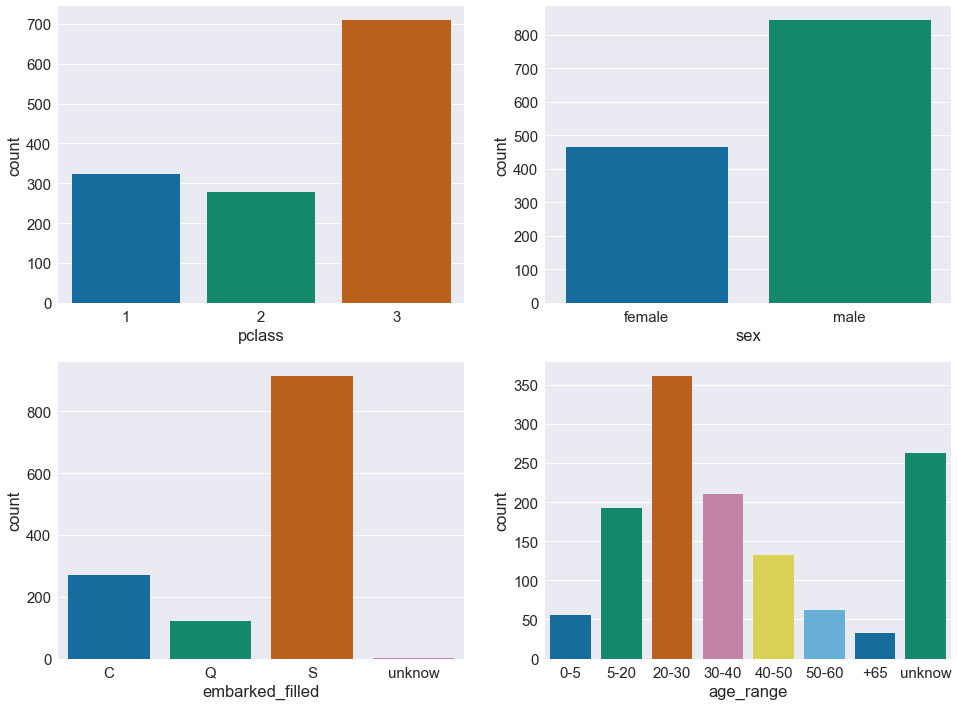

In [17]:
def plots(df, chart_type, features_cols, kwars_chart={}, chart_cols=2):
    '''Plot features_cols of df database using `chart_type` from seaborn'''
    df = discrete_age_and_treat_embk(df)
    
    chart_rows = int((len(features_cols) - 1) / chart_cols + 1)
    partitions = list(partition_all(chart_cols, features_cols))

    fig, axs = plt.subplots(ncols=chart_cols, nrows=chart_rows)
    fig.set_size_inches(8 * chart_cols, 6 * chart_rows)
    
    if chart_rows == 1:
        for i, feature in enumerate(partitions[0]):
            pos = axs[i]
            chart_type(x=feature, data=df, ax=pos, **kwars_chart)
    else:
        for i, set_features in enumerate(partitions):
            for j, feature in enumerate(set_features):
                pos = axs[i][j]
                chart_type(x=feature, data=df, ax=pos, **kwars_chart)
                
plots(titanic, 
      sns.countplot, 
      ['pclass', 'sex', 'embarked_filled', 'age_range'], 
      {'palette': 'colorblind'})

### 3. Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.
It will be considered that the first letter of cabin is the floor.
For the ones that have more than one cabin registred, they have always the same floor in common, so there no is issue regarding treating those just using the first letter. There are a lot of missing cabins, so it will be desconsired from the analysis

In [18]:
missing_cabin = pd.isnull(titanic.cabin).sum()
print('Number of missing cabins: {m} in {r} rows'.format(m=missing_cabin, r=len(titanic)))

Number of missing cabins: 1014 in 1309 rows


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


floor,A,B,C,D,E,F,G,T
n,22.0,65.00,94.00,46.0,41.00,21.00,5.0,1.0
survived,0.5,0.72,0.61,0.7,0.73,0.62,0.6,0.0


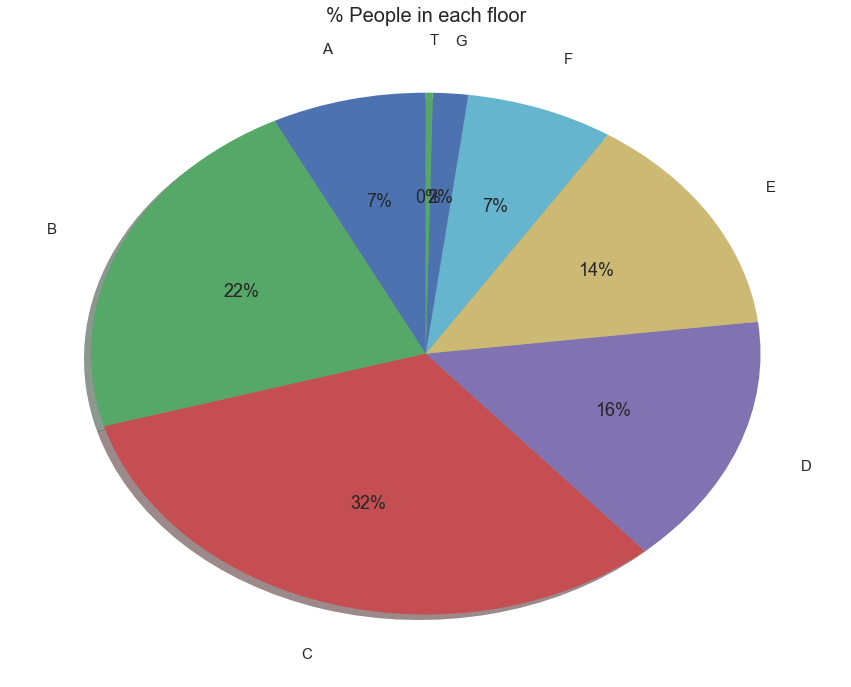

In [19]:
def plot_floor(df):
    df['floor'] = df['cabin'].apply(lambda x: list(x)[0])
    
    grouped = (df[['floor', 'survived']]
               .groupby('floor')
               .agg(['size', 'mean'])['survived']
               .rename(columns={'size': 'n', 'mean': 'survived'}))
    
    fig, axs = plt.subplots(ncols=1, nrows=1)
    fig.set_size_inches(15, 12)

    plt.pie(grouped['n'], 
            labels=list(grouped.index), 
            autopct='%.0f%%', 
            shadow=True, startangle=90,
            labeldistance=1.2);
    plt.title('% People in each floor', fontsize=20)

    return grouped.T.apply(lambda x: round(x, 2), axis=1)
    
plot_floor(titanic[pd.notnull(titanic.cabin)])

### 4. For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

Propotion of each class in titanic:


pclass,1,2,3
0,0.25,0.21,0.54


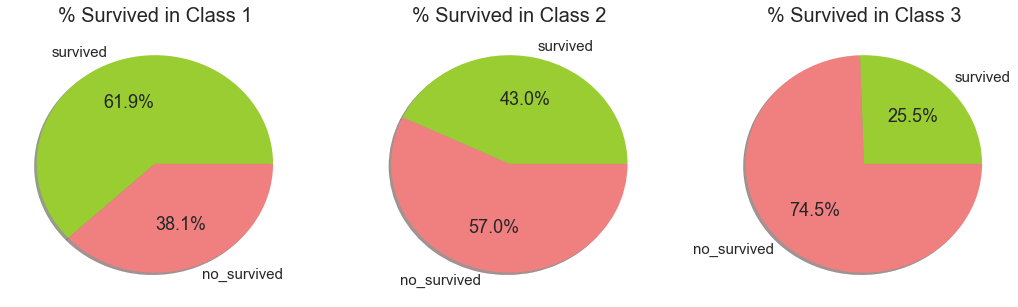

In [20]:
def plot_survived_by_class(df):
    fig, axs = plt.subplots(ncols=3, nrows=1)
    fig.set_size_inches(6 * 3, 5 * 1)
    
    grouped = df.groupby('pclass').mean()[['survived']].reset_index()
    grouped['no_survived'] = 1 - grouped['survived']
    colors = ['yellowgreen', 'lightcoral']
    for i, c in enumerate(list(grouped.pclass)):
        df_plot = grouped[grouped.pclass==c][['survived', 'no_survived']].T
        axs[i].pie(df_plot, labels=list(df_plot.index), colors=colors, autopct='%1.1f%%', shadow=True);
        axs[i].set_title('% Survived in Class {c}'.format(c=c), fontsize=20)
        
plot_survived_by_class(titanic)
print('Propotion of each class in titanic:')
pd.DataFrame(pd.DataFrame(titanic.groupby('pclass').size())[0].apply(lambda x: round(x / len(titanic), 2))).T

### 5. Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

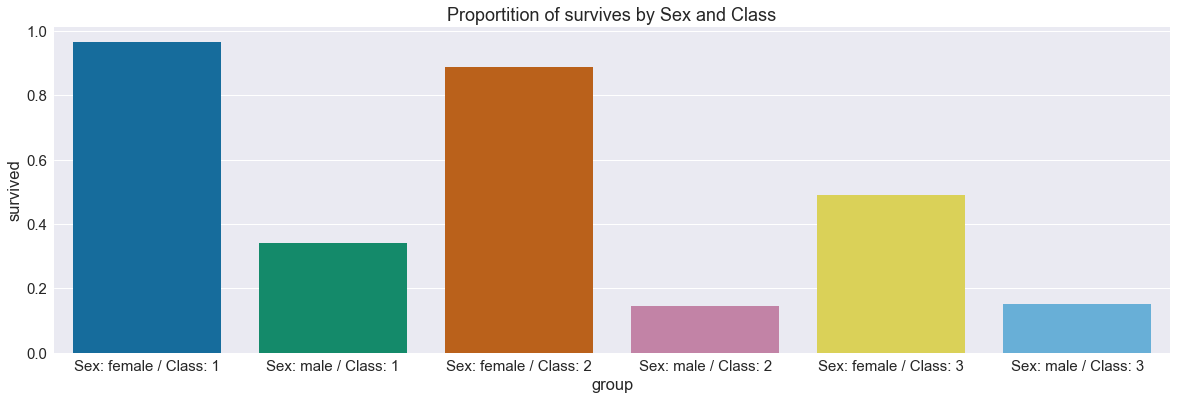

In [21]:
def survived_by_class_sex(df):
    grouped = pd.DataFrame(df.groupby(['pclass', 'sex']).mean())[['survived']].reset_index()
    grouped['group'] = grouped.apply(lambda x: 'Sex: {} / Class: {}'.format(x['sex'], x['pclass']), axis=1)
    fig, axs = plt.subplots(ncols=1, nrows=1)
    fig.set_size_inches(20, 6)
    sns.barplot(y='survived', x='group', data=grouped, palette='colorblind')
    plt.title('Proportition of survives by Sex and Class')

survived_by_class_sex(titanic)

### 6. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.
In this case, travelers with age equal nan won't be include in the analysis

In [22]:
titanic_valid_age = titanic[pd.notnull(titanic.age)]
median_age = titanic_valid_age.age.median()
titanic_valid_age['age_category'] = titanic_valid_age.age.apply(lambda x: '< 28' if x<28 else '>= 28')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
pd.DataFrame(titanic_valid_age.groupby(['age_category', 'pclass', 'sex']).mean()['survived']).apply(lambda x: round(x,3)).reset_index()

,age_category,pclass,sex,survived
0,< 28,1,female,0.950
1,< 28,1,male,0.536
2,< 28,2,female,0.902
3,< 28,2,male,0.235
4,< 28,3,female,0.528
5,< 28,3,male,0.194
6,>= 28,1,female,0.968
7,>= 28,1,male,0.309
8,>= 28,2,female,0.885
9,>= 28,2,male,0.078


Individually we have:

In [24]:
pd.DataFrame(titanic_valid_age.groupby(['age_category']).mean()['survived']).apply(lambda x: round(x,3)).reset_index()

,age_category,survived
0,< 28,0.421
1,>= 28,0.397


In [25]:
pd.DataFrame(titanic_valid_age.groupby(['pclass']).mean()['survived']).apply(lambda x: round(x,3)).reset_index()

,pclass,survived
0,1,0.637
1,2,0.441
2,3,0.261


In [26]:
pd.DataFrame(titanic_valid_age.groupby(['sex']).mean()['survived']).apply(lambda x: round(x,3)).reset_index()

,sex,survived
0,female,0.753
1,male,0.205
